In [1]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select train.csv

import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()


Saving house-prices-advanced-regression-techniques (2).zip to house-prices-advanced-regression-techniques (2).zip


KeyError: 'train.csv'

In [3]:
import zipfile
import os

zip_path = "house-prices-advanced-regression-techniques (2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("house_prices_data")

# Check the files inside
os.listdir("house_prices_data")


['sample_submission.csv', 'data_description.txt', 'test.csv', 'train.csv']

In [4]:
import pandas as pd

df = pd.read_csv("house_prices_data/train.csv")
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

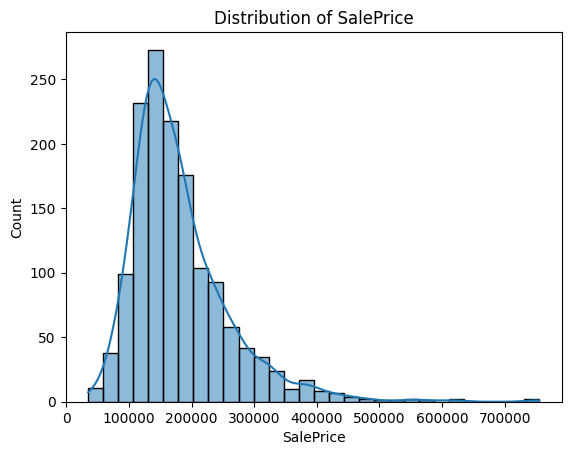

In [5]:
# Shape and first 5 rows
print(df.shape)
df.head()

# Basic info
df.info()

# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Columns with missing values:\n", missing[missing > 0])

# Summary statistics
df.describe()

# Visualize target variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()


In [6]:
# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical with mode
    else:
        df[col] = df[col].fillna(df[col].median())   # Fill numerical with median

# Verify missing values are gone
print(df.isnull().sum().sum())


0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("\n")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")


--- Linear Regression ---
RMSE: 35312.138344718966
MAE: 21580.19135766149
R2 Score: 0.8374323228511225


--- Random Forest ---
RMSE: 28478.989006931526
MAE: 17688.02164383562
R2 Score: 0.8942609749638852


--- XGBoost ---
RMSE: 25650.223234896028
MAE: 16430.9921875
R2 Score: 0.9142234921455383




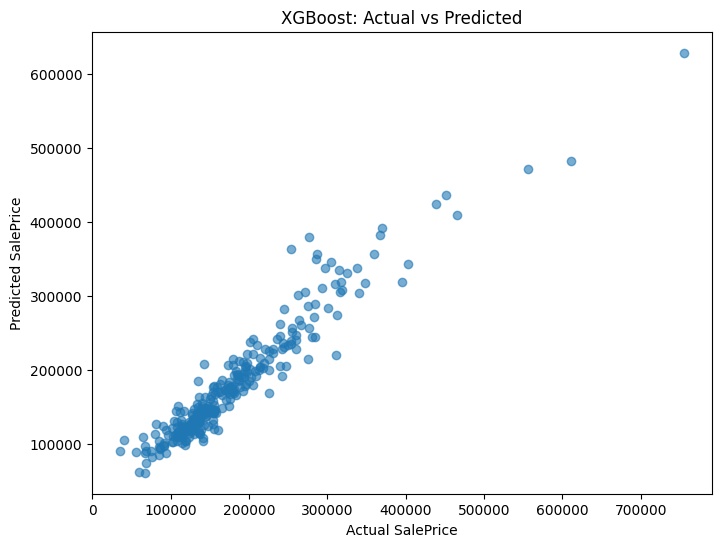

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


In [13]:
import joblib

# Save model
joblib.dump(xgb, 'xgb_house_price_model.pkl')

# Save cleaned dataset
df.to_csv('cleaned_house_prices.csv', index=False)


In [15]:
!git config --global user.name "Nxt-gen-hub"
!git config --global user.email "Parvathy.M@nxtgenaiservices.com"

!git init



hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [16]:
# Rename current branch to match the one you want
!git branch -m Intern-project


In [17]:
!git config --global user.name "Nxt-gen-hub"
!git config --global user.email "Parvathy.M@nxtgenaiservices.com"


In [18]:
!git branch -m nxtgen-project1


In [19]:
!git remote add origin https://github.com/mariyanxgen/Intern-progress.git


In [20]:
!git remote remove origin


In [21]:
!git add .
!git commit -m "Add House Price Prediction project from Colab"
!git push -u origin nxtgen-project1 --force


[nxtgen-project1 (root-commit) 7d6c87c] Add House Price Prediction project from Colab
 28 files changed, 57390 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.09.15/17.49.58.939259.log
 create mode 100644 .config/logs/2025.09.15/17.50.20.154978.log
 create mode 100644 .config/logs/2025.09.15/17.50.29.040990.log
 create mode 100644 .config/logs/2025.09.15/17.50.30.378703.log
 create mode 100644 .config/logs/2025.09.15/17.50.39.268063.log
 create mode 100644 .config/logs/2025.09.15/17.50.40.013673.log
 create mode 100644

In [22]:
!git remote add origin https://github.com/mariyanxgen/Intern-progress.git


In [23]:
!git remote -v


origin	https://github.com/mariyanxgen/Intern-progress.git (fetch)
origin	https://github.com/mariyanxgen/Intern-progress.git (push)


In [24]:
!git push -u origin nxtgen-project1 --force


fatal: could not read Username for 'https://github.com': No such device or address


In [25]:
!git clone https://github.com/Nxtgen-hub/NxtgenAI-project1-ParvathyM.git

Cloning into 'NxtgenAI-project1-ParvathyM'...
fatal: could not read Username for 'https://github.com': No such device or address


In [26]:
%cd NxtgenAI-project1-ParvathyM

[Errno 2] No such file or directory: 'NxtgenAI-project1-ParvathyM'
/content


In [27]:
!pwd

/content


In [28]:
!ls -a

 .
 ..
 cleaned_house_prices.csv
 .config
 .git
'house-prices-advanced-regression-techniques (2).zip'
 house_prices_data
 sample_data
 xgb_house_price_model.pkl
